In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
from google.colab import drive

# Mount Google Drive to save files (optional)
# drive.mount('/content/drive')

# Create the folder structure
folders = ['raw_data', 'cleaned_data', 'source_code', 'results']
for folder in folders:
    os.makedirs(f'question1/{folder}', exist_ok=True)

print("Folder structure created successfully!")

Folder structure created successfully!


In [ ]:
# Stage 1: Data Collection and Storage
print("Stage 1: Data Collection and Storage")

# Creating the dataset from the assignment information
data = {
    'Height': [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    'Weight': [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    'Age': [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    'Grip_strength': [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    'Frailty': ['N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the raw data
print("\nRaw Data:")
display(df)

# Save the raw data to CSV
df.to_csv('question1/raw_data/frailty_data.csv', index=False)
print("Raw data saved to 'question1/raw_data/frailty_data.csv'")

Stage 1: Data Collection and Storage

Raw Data:


,Height,Weight,Age,Grip_strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


Raw data saved to 'question1/raw_data/frailty_data.csv'


In [ ]:
# Stage 2: Data Processing and Analysis
print("\nStage 2: Data Processing and Analysis")

# Load the raw data
df = pd.read_csv('question1/raw_data/frailty_data.csv')

# Basic data inspection
print("\nData Overview:")
display(df.info())
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Convert Frailty to a binary variable for analysis
df['Frailty_Binary'] = df['Frailty'].map({'Y': 1, 'N': 0})

# Standardize numerical variables
scaler = StandardScaler()
numerical_cols = ['Height', 'Weight', 'Age', 'Grip_strength']
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[numerical_cols]),
    columns=numerical_cols
)
df_scaled['Frailty_Binary'] = df['Frailty_Binary']
df_scaled['Frailty'] = df['Frailty']

# Display processed data
print("\nProcessed Data with Binary Frailty Variable:")
display(df)
print("\nStandardized Data:")
display(df_scaled)

# Save the processed data
df.to_csv('question1/cleaned_data/frailty_data_processed.csv', index=False)
df_scaled.to_csv('question1/cleaned_data/frailty_data_scaled.csv', index=False)

print("Data processing complete")
print("Processed data saved to 'question1/cleaned_data/'")


Stage 2: Data Processing and Analysis

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Height         10 non-null     float64
 1   Weight         10 non-null     int64  
 2   Age            10 non-null     int64  
 3   Grip_strength  10 non-null     int64  
 4   Frailty        10 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 532.0+ bytes


None


Summary Statistics:


,Height,Weight,Age,Grip_strength
count,10.000000,10.000000,10.000000,10.000000
mean,68.600000,131.900000,32.500000,26.000000
std,1.670662,14.231811,12.860361,4.521553
min,65.800000,112.000000,17.000000,19.000000
25%,67.825000,120.750000,22.250000,22.500000
50%,68.450000,136.000000,29.500000,27.000000
75%,69.700000,141.750000,43.500000,29.750000
max,71.500000,153.000000,51.000000,31.000000



Missing Values:


,0
Height,0
Weight,0
Age,0
Grip_strength,0
Frailty,0



Processed Data with Binary Frailty Variable:


,Height,Weight,Age,Grip_strength,Frailty,Frailty_Binary
0,65.8,112,30,30,N,0
1,71.5,136,19,31,N,0
2,69.4,153,45,29,N,0
3,68.2,142,22,28,Y,1
4,67.8,144,29,24,Y,1
5,68.7,123,50,26,N,0
6,69.8,141,51,22,Y,1
7,70.1,136,23,20,Y,1
8,67.9,112,17,19,N,0
9,66.8,120,39,31,N,0



Standardized Data:


,Height,Weight,Age,Grip_strength,Frailty_Binary,Frailty
0,-1.766641,-1.473912,-0.204911,0.932505,0,N
1,1.829735,0.303670,-1.106520,1.165631,0,N
2,0.504754,1.562791,1.024556,0.699379,0,N
3,-0.252377,0.748066,-0.860627,0.466252,1,Y
4,-0.504754,0.896198,-0.286876,-0.466252,1,Y
5,0.063094,-0.659187,1.434378,0.000000,0,N
6,0.757132,0.674000,1.516343,-0.932505,1,Y
7,0.946415,0.303670,-0.778662,-1.398757,1,Y
8,-0.441660,-1.473912,-1.270449,-1.631883,0,N
9,-1.135698,-0.881385,0.532769,1.165631,0,N


Data processing complete
Processed data saved to 'question1/cleaned_data/'



Stage 3: Results and Visualization

Correlation Matrix:


,Height,Weight,Age,Grip_strength,Frailty_Binary
Height,1.000000,0.571525,-0.032580,-0.167682,0.193186
Weight,0.571525,1.000000,0.190926,0.032807,0.535200
Age,-0.032580,0.190926,1.000000,0.133756,-0.083655
Grip_strength,-0.167682,0.032807,0.133756,1.000000,-0.475867
Frailty_Binary,0.193186,0.535200,-0.083655,-0.475867,1.000000


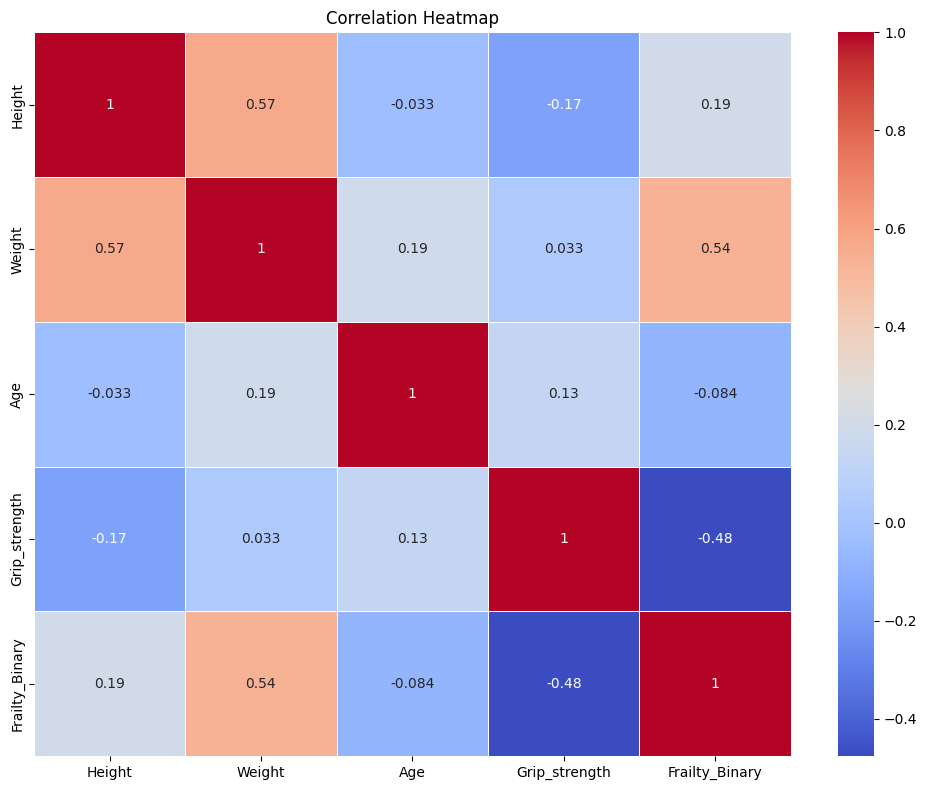

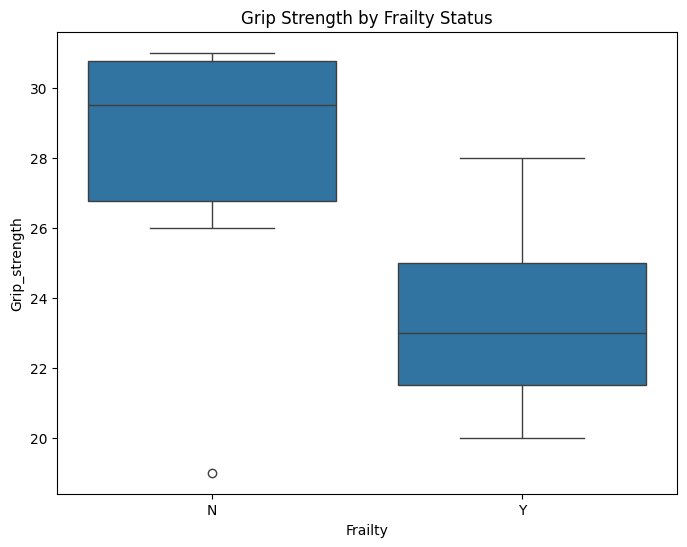

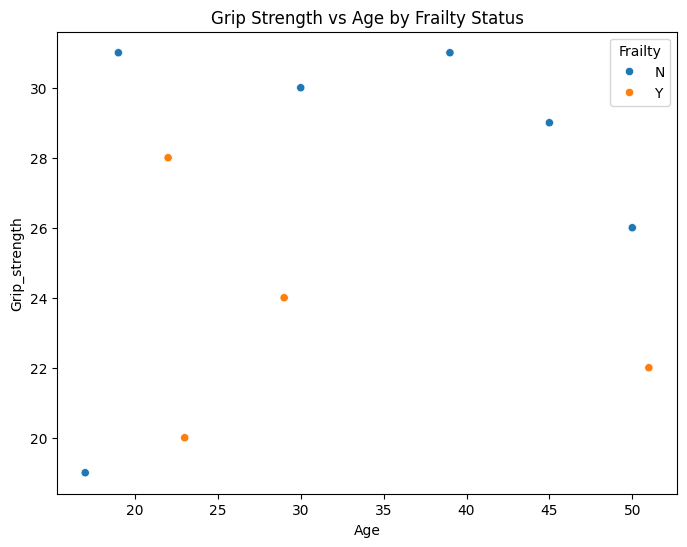

Visualizations saved to 'question1/results/'


from matplotlib import pyplot as plt
correlation['Height'].plot(kind='hist', bins=20, title='Height')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation['Grip_strength'].plot(kind='hist', bins=20, title='Grip_strength')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation.plot(kind='scatter', x='Height', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation.plot(kind='scatter', x='Weight', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation.plot(kind='scatter', x='Age', y='Grip_strength', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation.plot(kind='scatter', x='Grip_strength', y='Frailty_Binary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation['Height'].plot(kind='line', figsize=(8, 4), title='Height')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation['Grip_strength'].plot(kind='line', figsize=(8, 4), title='Grip_strength')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Stage 3: Results and Visualization
print("\nStage 3: Results and Visualization")

# Correlation analysis
correlation = df[numerical_cols + ['Frailty_Binary']].corr()
print("\nCorrelation Matrix:")
display(correlation)

# Save correlation matrix
correlation.to_csv('question1/results/correlation_matrix.csv')

# Visualization 1: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('question1/results/correlation_heatmap.png')
plt.show()

# Visualization 2: Grip Strength by Frailty
plt.figure(figsize=(8, 6))
sns.boxplot(x='Frailty', y='Grip_strength', data=df)
plt.title('Grip Strength by Frailty Status')
plt.savefig('question1/results/grip_strength_by_frailty.png')
plt.show()

# Visualization 3: Grip Strength vs Age with Frailty coloring
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Grip_strength', hue='Frailty', data=df)
plt.title('Grip Strength vs Age by Frailty Status')
plt.savefig('question1/results/grip_strength_vs_age.png')
plt.show()

print("Visualizations saved to 'question1/results/'")

In [ ]:
# Save the workflow description
workflow_description = """
# Three-Stage Reproducible Workflow for Frailty Analysis

## Stage 1: Data Collection and Storage
- Collected raw data about female participants including Height, Weight, Age, Grip strength, and Frailty status
- Stored the raw data in CSV format in the 'raw_data' folder
- Created consistent naming conventions and documented the data sources

## Stage 2: Data Processing and Analysis
- Loaded the raw data from Stage 1
- Performed data validation and cleaning:
  - Checked for missing values
  - Converted categorical variables to binary format for analysis
  - Standardized numerical variables for comparative analysis
- Stored the processed data in the 'cleaned_data' folder

## Stage 3: Results and Visualization
- Performed correlation analysis to identify relationships between variables
- Created visualizations to illustrate key findings:
  - Correlation heatmap to show relationships between all variables
  - Box plot comparing grip strength between frailty groups
  - Scatter plot showing the relationship between age, grip strength, and frailty
- Stored results and visualizations in the 'results' folder
- Documented findings and analysis process

This workflow ensures reproducibility by:
1. Maintaining clear separation between raw data, processing steps, and results
2. Documenting each stage of the process
3. Using version control (GitHub) to track changes
4. Creating a well-defined folder structure
5. Using open-source tools and formats for maximum compatibility
"""

with open('question1/source_code/workflow_description.md', 'w') as f:
    f.write(workflow_description)

# Save this script as the source code
with open('question1/source_code/frailty_analysis.py', 'w') as f:
    f.write("# This Python script implements the three-stage reproducible workflow for frailty analysis\n")
    f.write("# See the full implementation in the Jupyter notebook\n")
    # You would typically save the actual script here

print("\nWorkflow description saved to 'question1/source_code/workflow_description.md'")
print("Assignment Question 1 complete!")


Workflow description saved to 'question1/source_code/workflow_description.md'
Assignment Question 1 complete!
